### Download the necessary libraries

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Load the Dataset

In [501]:
df = pd.read_csv("C:\\Users\\captr\\OneDrive\\Desktop\\AusApparalSales4thQrt2020.csv")
df.head(5)
            

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [502]:
type(df['Date'])

pandas.core.series.Series

### Checking for the missing values

In [503]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

### Checking for the duplicate values (if any)

In [504]:
df.duplicated().sum()

0

### Running Basic Summary Statistics of the data 

In [505]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit,7560.0,18.005423,12.901403,2.0,8.0,14.0,26.0,65.0
Sales,7560.0,45013.558201,32253.506944,5000.0,20000.0,35000.0,65000.0,162500.0


### Checking how many times different states of Australia appeared in our dataset

In [506]:
state_counts=df['State'].value_counts()
state_counts

State
 WA     1080
 NT     1080
 SA     1080
 VIC    1080
 QLD    1080
 NSW    1080
 TAS    1080
Name: count, dtype: int64

In [507]:
state_counts.sort_values()

State
 WA     1080
 NT     1080
 SA     1080
 VIC    1080
 QLD    1080
 NSW    1080
 TAS    1080
Name: count, dtype: int64

### Two of our features i.e Unit and Sales were quite wide apart in terms of their range hence performed min-max-scaling to transform it to a fixed range between 0 to 1 or [0,1]

In [508]:
from sklearn.preprocessing import MinMaxScaler

In [509]:
scaler= MinMaxScaler()
scaler.fit(df[['Sales']])
df['Sales']= scaler.transform(df[['Sales']])
scaler.fit(df[['Unit']])
df['Unit']= scaler.transform(df[['Unit']])
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


### Plotted Unit against time

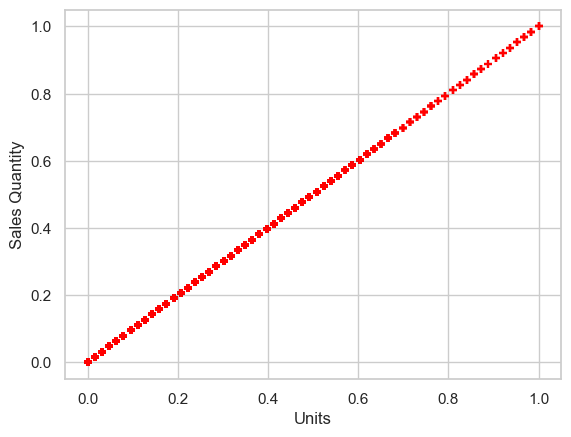

In [510]:
%matplotlib inline 
plt.scatter(df['Unit'],df['Sales'], color='red', marker='+')
plt.xlabel('Units')
plt.ylabel('Sales Quantity')
plt.show()

### Grouped the data according to the State/region

In [511]:
g=df.groupby('State')
g.head(5)


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873
12,1-Oct-2020,Morning,NT,Kids,0.174603,0.174603
13,1-Oct-2020,Morning,NT,Men,0.047619,0.047619
14,1-Oct-2020,Morning,NT,Women,0.031746,0.031746
15,1-Oct-2020,Morning,NT,Seniors,0.126984,0.126984
16,1-Oct-2020,Afternoon,NT,Kids,0.174603,0.174603


In [512]:
for i, i_df in g:
    print(i)
    print(i_df)

 NSW
             Date        Time State     Group      Unit     Sales
60     1-Oct-2020     Morning   NSW      Kids  0.587302  0.587302
61     1-Oct-2020     Morning   NSW       Men  0.238095  0.238095
62     1-Oct-2020     Morning   NSW     Women  0.507937  0.507937
63     1-Oct-2020     Morning   NSW   Seniors  0.333333  0.333333
64     1-Oct-2020   Afternoon   NSW      Kids  0.603175  0.603175
...           ...         ...   ...       ...       ...       ...
7543  30-Dec-2020   Afternoon   NSW   Seniors  0.269841  0.269841
7544  30-Dec-2020     Evening   NSW      Kids  0.555556  0.555556
7545  30-Dec-2020     Evening   NSW       Men  0.619048  0.619048
7546  30-Dec-2020     Evening   NSW     Women  0.555556  0.555556
7547  30-Dec-2020     Evening   NSW   Seniors  0.333333  0.333333

[1080 rows x 6 columns]
 NT
             Date        Time State     Group      Unit     Sales
12     1-Oct-2020     Morning    NT      Kids  0.174603  0.174603
13     1-Oct-2020     Morning    NT       

### Performed one hot encoding to convert the categorical variables in Unit and Sales column to machine readable numeric form

In [513]:
from sklearn.preprocessing import LabelEncoder
le_Time=LabelEncoder()
le_State= LabelEncoder()
le_Group = LabelEncoder()

In [514]:
df['Time_n']= le_Time.fit_transform(df['Time'])
df['State_n']= le_State.fit_transform(df['State'])
df['Group_n']= le_Group.fit_transform(df['Group'])
df.head()

,Date,Time,State,Group,Unit,Sales,Time_n,State_n,Group_n
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238,2,6,0
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238,2,6,1
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746,2,6,3
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349,2,6,2
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873,0,6,0


In [515]:
df.head()
df = df.reset_index()  # Resets the index, turning 'Date' back into a column
print(df.head())  # Check the first few rows



   index        Date        Time State     Group      Unit     Sales  Time_n  \
0      0  1-Oct-2020     Morning    WA      Kids  0.095238  0.095238       2   
1      1  1-Oct-2020     Morning    WA       Men  0.095238  0.095238       2   
2      2  1-Oct-2020     Morning    WA     Women  0.031746  0.031746       2   
3      3  1-Oct-2020     Morning    WA   Seniors  0.206349  0.206349       2   
4      4  1-Oct-2020   Afternoon    WA      Kids  0.015873  0.015873       0   

   State_n  Group_n  
0        6        0  
1        6        1  
2        6        3  
3        6        2  
4        6        0  


### Calculated the mean and Standard Deviation of the Unit Column

In [516]:
mean_value = df['Unit'].mean()
median_value = df['Unit'].median()
std_value = df['Unit'].std()

print("Mean of Unit column:", mean_value)
print("Median of Unit column:", median_value)
print("Standard Deviation of Unit column:", std_value)



Mean of Unit column: 0.2540543377844965
Median of Unit column: 0.19047619047619047
Standard Deviation of Unit column: 0.20478417107280086


### Calculated the mean and standard deviation of the Sales Column

In [517]:
mean_value = df['Sales'].mean()
median_value = df['Sales'].median()
std_value = df['Sales'].std()

print("Mean of Sales column:", mean_value)
print("Median of Sales column:", median_value)
print("Standard Deviation of Sales column:", std_value)



Mean of Sales column: 0.25405433778449654
Median of Sales column: 0.1904761904761905
Standard Deviation of Sales column: 0.2047841710728009


### Identifying the group with the highest sales and lowest sales respectively

In [518]:
# Group by 'Group' and calculate total sales
group_sales = df.groupby('Group_n')['Sales'].sum()

# Identify the group with the highest and lowest sales
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

# Get the sales values
highest_sales_value = group_sales.max()
lowest_sales_value = group_sales.min()

print(f"Group with the highest sales: {highest_sales_group} ({highest_sales_value})")
print(f"Group with the lowest sales: {lowest_sales_group} ({lowest_sales_value})")


Group with the highest sales: 1 (484.44444444444446)
Group with the lowest sales: 2 (473.57142857142856)


In [519]:
df.columns

Index(['index', 'Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'Time_n',
       'State_n', 'Group_n'],
      dtype='object')

### Gathering the weekly, Monthly and quarterly report 

In [520]:
import pandas as pd

# Assuming `df` contains 'Date' and 'Sales' columns
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the Date column is in datetime format

# Set the Date column as the index for resampling
df.set_index('Date', inplace=True)

# Weekly Report
weekly_report = df.resample('W').sum()

# Monthly Report
monthly_report = df.resample('M').sum()

# Quarterly Report
quarterly_report = df.resample('Q').sum()

# Reset index for reports (optional, for better formatting)
weekly_report.reset_index(inplace=True)
monthly_report.reset_index(inplace=True)
quarterly_report.reset_index(inplace=True)

# Save reports to files
weekly_report.to_csv('weekly_report.csv', index=False)
monthly_report.to_csv('monthly_report.csv', index=False)
quarterly_report.to_csv('quarterly_report.csv', index=False)

# Print summaries
print("Weekly Report:\n", weekly_report.head())
print("Monthly Report:\n", monthly_report.head())
print("Quarterly Report:\n", quarterly_report.head())


Weekly Report:
         Date    index                                               Time  \
0 2020-10-04    56280   Morning Morning Morning Morning Afternoon Aft...   
1 2020-10-11   370146   Morning Morning Morning Morning Afternoon Aft...   
2 2020-10-18   715890   Morning Morning Morning Morning Afternoon Aft...   
3 2020-10-25  1061634   Morning Morning Morning Morning Afternoon Aft...   
4 2020-11-01  1185156   Morning Morning Morning Morning Afternoon Aft...   

                                               State  \
0   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
1   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
3   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
4   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                               Group        Unit       Sales  \
0   Kids Men Women Seniors Kids Men Women Seniors...   84.857143   84.857143   
1   Kids Men Women Seniors Kid

In [521]:
df_new= pd.read_csv("C:\\Users\\captr\\OneDrive\\Desktop\\AusApparalSales4thQrt2020.csv")
df_new.head(3)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000


### Plotted Group Vs States 

In [522]:
Group_counts= df_new['Group'].value_counts()
Group_counts
top_groups=Group_counts.head(10)
top_groups

Group
 Kids       1890
 Men        1890
 Women      1890
 Seniors    1890
Name: count, dtype: int64

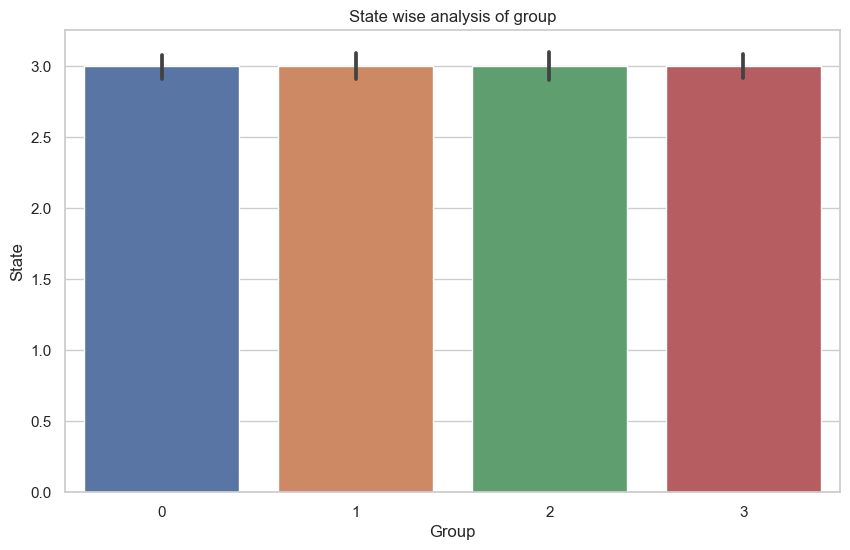

In [523]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=df['Group_n'], y=df['State_n'])
plt.xlabel('Group')
plt.ylabel('State')
plt.title('State wise analysis of group')
plt.show()

In [524]:
demography= df.groupby(['Group_n','State_n'])
df=df.reset_index()
df.head()

,Date,index,Time,State,Group,Unit,Sales,Time_n,State_n,Group_n
0,2020-10-01,0,Morning,WA,Kids,0.095238,0.095238,2,6,0
1,2020-10-01,1,Morning,WA,Men,0.095238,0.095238,2,6,1
2,2020-10-01,2,Morning,WA,Women,0.031746,0.031746,2,6,3
3,2020-10-01,3,Morning,WA,Seniors,0.206349,0.206349,2,6,2
4,2020-10-01,4,Afternoon,WA,Kids,0.015873,0.015873,0,6,0


### State-wise Sales Analysis for Different Demographic Groups

In [525]:
# Mapping Group Codes to Demographics
group_mapping = {0: 'Kids', 1: 'Women', 2: 'Men', 3: 'Seniors'}
df['Demographic'] = df['Group_n'].map(group_mapping)
group_mapping_2 = {0: 'TAS', 1: 'NSW', 2: 'QLD', 3: 'VIC', 4:'SA', 5:'NT', 6:'WA'}
df['Region']= df['State_n'].map(group_mapping_2)

sales_data = df.groupby(['State_n', 'Demographic'])['Sales'].sum().reset_index()
sales_data

,State_n,Demographic,Sales
0,0,Kids,109.444444
1,0,Men,106.904762
2,0,Seniors,113.158730
3,0,Women,112.206349
4,1,Kids,27.619048
5,1,Men,26.126984
6,1,Seniors,27.317460
7,1,Women,28.015873
8,2,Kids,45.460317
9,2,Men,43.428571


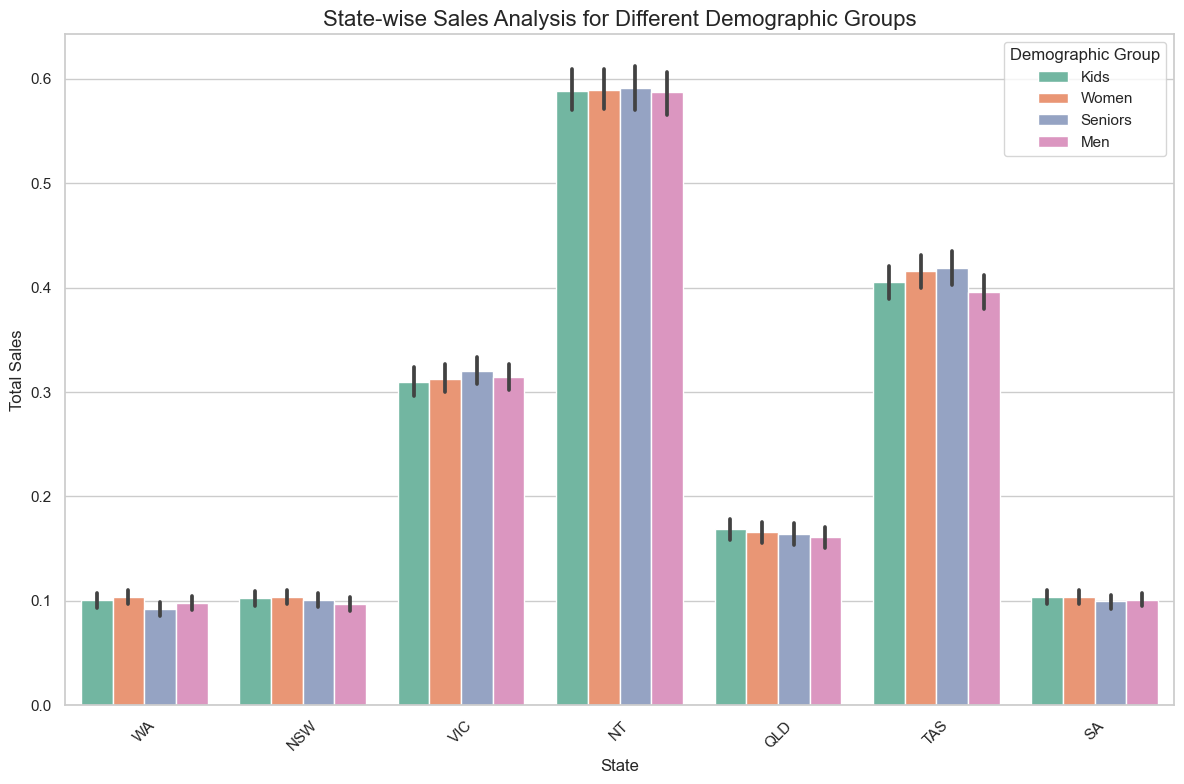

In [526]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', hue='Demographic', data=df, palette="Set2")

# Customize plot
plt.title("State-wise Sales Analysis for Different Demographic Groups", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Demographic Group")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [527]:
df['State_n'].unique()

array([6, 1, 3, 5, 2, 0, 4])

In [528]:
df.tail()

,Date,index,Time,State,Group,Unit,Sales,Time_n,State_n,Group_n,Demographic,Region
7555,2020-12-30,7555,Afternoon,TAS,Seniors,0.190476,0.190476,0,4,2,Men,SA
7556,2020-12-30,7556,Evening,TAS,Kids,0.206349,0.206349,1,4,0,Kids,SA
7557,2020-12-30,7557,Evening,TAS,Men,0.206349,0.206349,1,4,1,Women,SA
7558,2020-12-30,7558,Evening,TAS,Women,0.142857,0.142857,1,4,3,Seniors,SA
7559,2020-12-30,7559,Evening,TAS,Seniors,0.174603,0.174603,1,4,2,Men,SA


### State-wise Sales Analysis for Different Regions

In [529]:
group_mapping = {0: 'Kids', 1: 'Women', 2: 'Men', 3: 'Seniors'}
df['Demographic'] = df['Group_n'].map(group_mapping)
group_mapping_2 = {0: 'TAS', 1: 'NSW', 2: 'QLD', 3: 'VIC', 4:'SA', 5:'NT', 6:'WA'}
df['Region'] = df['State_n'].map(group_mapping_2)

sales_data_2 = df.groupby(['Group_n', 'Region'])['Sales'].sum().reset_index()
df.head()


,Date,index,Time,State,Group,Unit,Sales,Time_n,State_n,Group_n,Demographic,Region
0,2020-10-01,0,Morning,WA,Kids,0.095238,0.095238,2,6,0,Kids,WA
1,2020-10-01,1,Morning,WA,Men,0.095238,0.095238,2,6,1,Women,WA
2,2020-10-01,2,Morning,WA,Women,0.031746,0.031746,2,6,3,Seniors,WA
3,2020-10-01,3,Morning,WA,Seniors,0.206349,0.206349,2,6,2,Men,WA
4,2020-10-01,4,Afternoon,WA,Kids,0.015873,0.015873,0,6,0,Kids,WA


In [530]:
sales_data_2

,Group_n,Region,Sales
0,0,NSW,27.619048
1,0,NT,158.793651
2,0,QLD,45.460317
3,0,SA,28.095238
4,0,TAS,109.444444
5,0,VIC,83.587302
6,0,WA,27.142857
7,1,NSW,28.015873
8,1,NT,159.095238
9,1,QLD,44.714286


   Group_n Region       Sales
0        0    NSW   27.619048
1        0     NT  158.793651
2        0    QLD   45.460317
3        0     SA   28.095238
4        0    TAS  109.444444


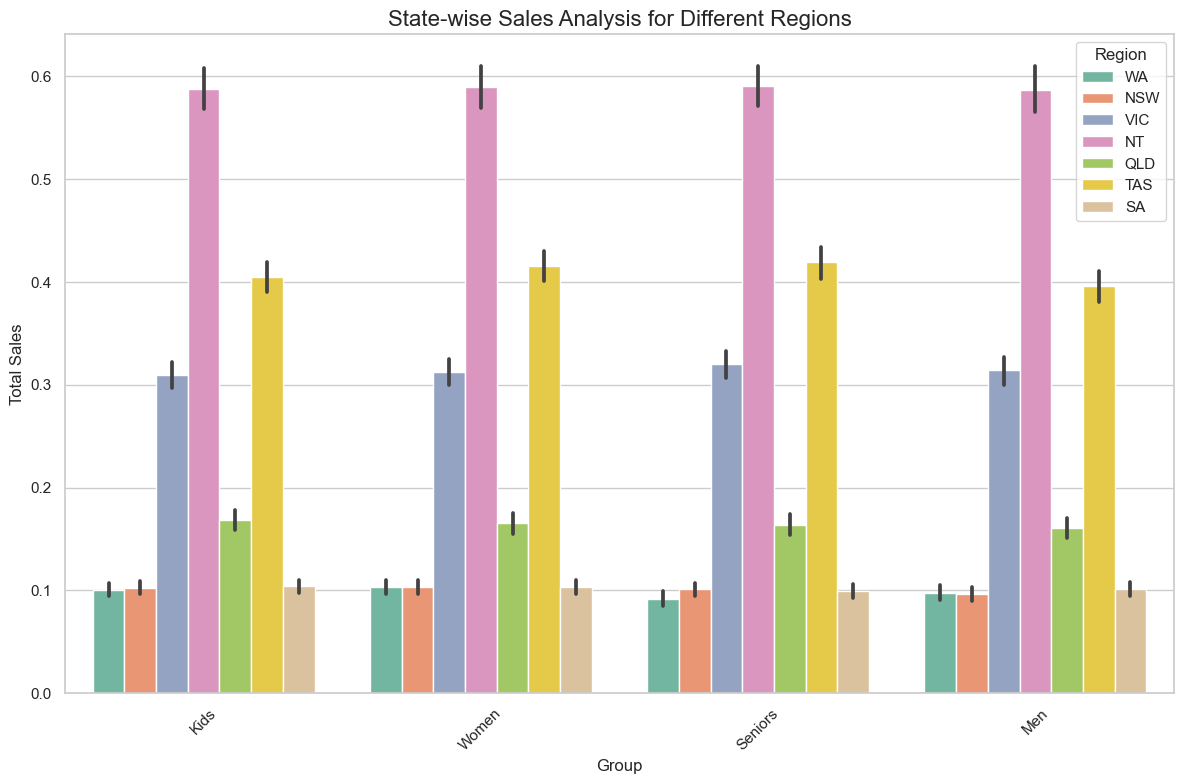

In [531]:
# Ensure 'sales_data_2' has the correct data
print(sales_data_2.head())  # Check the first few rows

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Demographic', y='Sales', hue='Region', data=df, palette="Set2")

# Customize the plot
plt.title("State-wise Sales Analysis for Different Regions", fontsize=16)
plt.xlabel("Group", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### Sales Analysis by Hour of the Day

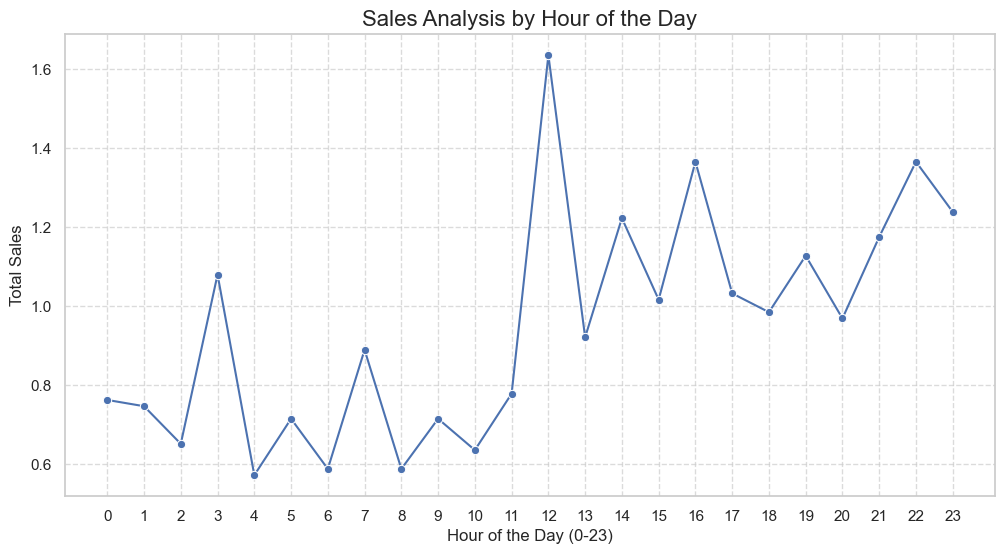

In [532]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (Use your actual dataset)
# Ensure 'Date' and 'Time' are in proper datetime format
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='H'),
    'Sales': [i % 24 + 1 for i in range(100)]
})

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the hour from the Date column
df['Hour_of_day'] = data['Date'].dt.hour

# Group sales data by hour of the day
sales_by_time = df.groupby('Hour_of_day')['Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour_of_day', y='Sales', data=sales_by_time, marker="o", color="b")

# Formatting the plot
plt.title("Sales Analysis by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day (0-23)", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours from 0 to 23 are displayed
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [533]:
sales_by_time = df.groupby('Hour_of_day')['Sales'].sum().reset_index() 
sales_by_time

,Hour_of_day,Sales
0,0.0,0.761905
1,1.0,0.746032
2,2.0,0.650794
3,3.0,1.079365
4,4.0,0.571429
5,5.0,0.714286
6,6.0,0.587302
7,7.0,0.888889
8,8.0,0.587302
9,9.0,0.714286


In [534]:
df.head()

,Date,index,Time,State,Group,Unit,Sales,Time_n,State_n,Group_n,Demographic,Region,Hour_of_day
0,2020-10-01,0,Morning,WA,Kids,0.095238,0.095238,2,6,0,Kids,WA,0.0
1,2020-10-01,1,Morning,WA,Men,0.095238,0.095238,2,6,1,Women,WA,1.0
2,2020-10-01,2,Morning,WA,Women,0.031746,0.031746,2,6,3,Seniors,WA,2.0
3,2020-10-01,3,Morning,WA,Seniors,0.206349,0.206349,2,6,2,Men,WA,3.0
4,2020-10-01,4,Afternoon,WA,Kids,0.015873,0.015873,0,6,0,Kids,WA,4.0


### Plotting Correlation matrix to identify the important features that affects the sales

In [543]:
df_numeric= df.drop(['Time','State','Group','Demographic','Region'],axis='columns')
df_numeric

,Date,index,Unit,Sales,Time_n,State_n,Group_n,Hour_of_day
0,2020-10-01,0,0.095238,0.095238,2,6,0,0.0
1,2020-10-01,1,0.095238,0.095238,2,6,1,1.0
2,2020-10-01,2,0.031746,0.031746,2,6,3,2.0
3,2020-10-01,3,0.206349,0.206349,2,6,2,3.0
4,2020-10-01,4,0.015873,0.015873,0,6,0,4.0
...,...,...,...,...,...,...,...,...
7555,2020-12-30,7555,0.190476,0.190476,0,4,2,NaN
7556,2020-12-30,7556,0.206349,0.206349,1,4,0,NaN
7557,2020-12-30,7557,0.206349,0.206349,1,4,1,NaN
7558,2020-12-30,7558,0.142857,0.142857,1,4,3,NaN


In [544]:
corr_matrix= df_numeric.corr()
corr_matrix

,Date,index,Unit,Sales,Time_n,State_n,Group_n,Hour_of_day
Date,1.000000e+00,0.999885,0.100658,0.100658,2.593151e-15,2.481039e-15,-1.317944e-15,0.148294
index,9.998850e-01,1.000000,0.104095,0.104095,-7.482612e-04,-3.534798e-03,4.098395e-04,0.131689
Unit,1.006582e-01,0.104095,1.000000,1.000000,1.004629e-03,-6.439166e-03,-1.105101e-03,0.309362
Sales,1.006582e-01,0.104095,1.000000,1.000000,1.004629e-03,-6.439166e-03,-1.105101e-03,0.309362
Time_n,2.593151e-15,-0.000748,0.001005,0.001005,1.000000e+00,-3.003558e-18,5.743231e-18,-0.286025
State_n,2.481039e-15,-0.003535,-0.006439,-0.006439,-3.003558e-18,1.000000e+00,-3.599018e-18,-0.083092
Group_n,-1.317944e-15,0.000410,-0.001105,-0.001105,5.743231e-18,-3.599018e-18,1.000000e+00,0.126630
Hour_of_day,1.482944e-01,0.131689,0.309362,0.309362,-2.860248e-01,-8.309249e-02,1.266305e-01,1.000000


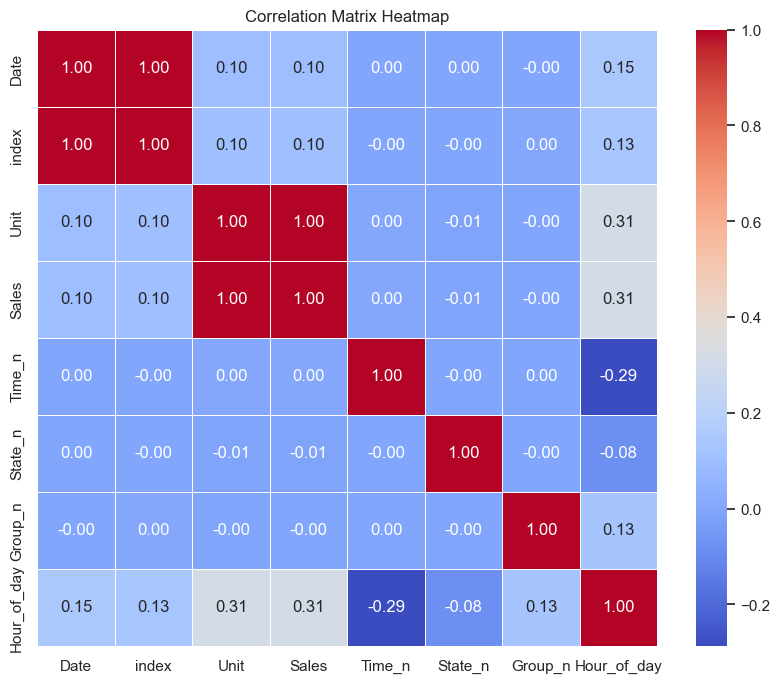

In [545]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### from the correlation matrix we can clearly see that only Unit and Hour of the day column/feature has a strong correlation with the Sales. But still we would confirm this with Hypothesis testing

In [546]:
df_numeric.head()


,Date,index,Unit,Sales,Time_n,State_n,Group_n,Hour_of_day
0,2020-10-01,0,0.095238,0.095238,2,6,0,0.0
1,2020-10-01,1,0.095238,0.095238,2,6,1,1.0
2,2020-10-01,2,0.031746,0.031746,2,6,3,2.0
3,2020-10-01,3,0.206349,0.206349,2,6,2,3.0
4,2020-10-01,4,0.015873,0.015873,0,6,0,4.0


In [558]:
data = df_numeric.rename(columns=lambda x: x.strip())  # Removes leading/trailing spaces
data.head()


,Date,index,Unit,Sales,Time_n,State_n,Group_n,Hour_of_day
0,2020-10-01,0,0.095238,0.095238,2,6,0,0.0
1,2020-10-01,1,0.095238,0.095238,2,6,1,1.0
2,2020-10-01,2,0.031746,0.031746,2,6,3,2.0
3,2020-10-01,3,0.206349,0.206349,2,6,2,3.0
4,2020-10-01,4,0.015873,0.015873,0,6,0,4.0


### Null Hypothesis (H0):  "Units sold has nothing to do with sales revenue"

In [560]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


Unit_Sales_corr, Unit_Sales_pval = stats.spearmanr(data['Unit'], data['Sales'])

print(f"Spearman correlation between Unit and Sales: {Unit_Sales_corr:.2f}, p-value: {Unit_Sales_pval:.4f}")

# Regression analysis for age and shopping preferences
Unit_Sales_model = smf.ols('Sales ~ Unit', data=data).fit()


print("\nIn-store Purchases Regression Summary:\n", Unit_Sales_model.summary())



Spearman correlation between Unit and Sales: 1.00, p-value: 0.0000

In-store Purchases Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.949e+33
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:43:01   Log-Likelihood:             2.5725e+05
No. Observations:                7560   AIC:                        -5.145e+05
Df Residuals:                    7558   BIC:                        -5.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Since the p-value is < 0.05 The result is highly statistically significant, meaning there is strong evidence to reject the null hypothesis that "Units sold has nothing to do with sales revenue".

## Model Construction

### Input Variable (X): Unit and Hour of the day

In [ ]:
X= df_numeric.drop(['Date','index','Sales','Time_n','State_n','Group_n'],axis= 'columns')
X.head()

In [ ]:
X['Hour_of_day'].isnull().sum()

In [ ]:
X['Hour_of_day'].fillna(X['Hour_of_day'].mode()[0], inplace=True)  # Fill with mode


### Target Variable (Y) : Sales

In [ ]:
Y= df['Sales']
Y.head()

### Splitting the dataset into train and test parts where we are using 80% our data to train and 20% to test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

### Trying to plot a Linear regression model as we had previously seen that our data follows a linear pattern 

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, Y_train)
reg.score(X_test,Y_test)

### The R2 score of our model resulted in a perfect fit. 

In [ ]:
Y_pred= reg.predict(X_test)
Y_pred

In [ ]:
len(Y_pred)

In [ ]:
len(Y)

In [ ]:
Y = Y[:len(Y_pred)]
r2 = r2_score(Y_test, Y_pred)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

### Calculated the root mean square error as well to see how our model is performing 

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
rmse

### As it can be seen that our Root Mean Squared Error (RMSE) = 3.42 × 10⁻¹⁶ is extremely close to zero, which aligns with our R² = 1.0. This means our model is predicting Y_test almost perfectly. However, this is highly unusual in real-world scenarios and often indicates overfitting. Hence just to confirm we are using K-fold cross validation and Ridge Regression

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
reg= LinearRegression()
Score= cross_val_score(reg,X_test,Y_test,cv=3)
np.average(Score)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,Y_train)
ridge_reg.score(X_test,Y_test)

### As it can be seen and confirmed from above that the model performs and fits properly even after perform cross validation and ridge regression. This indicates that our model is reliable.

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
reg = LinearRegression()

# Fit the model on training data
reg.fit(X_train, Y_train)

# Now make predictions on the test data
Y_pred = reg.predict(X_test)

# You can now evaluate the performance using Y_pred
print("Predictions:", Y_pred)


In [540]:
reg.predict([[0.015873,4.0]])

C:\Users\captr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.015873])

### RMSE Plot

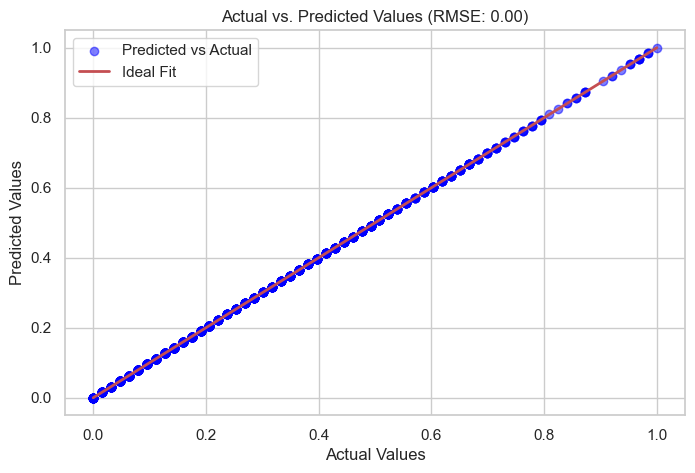

In [541]:
plt.figure(figsize=(8, 5))
plt.scatter(Y_test, Y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values (RMSE: {rmse:.2f})")
plt.legend()
plt.show()


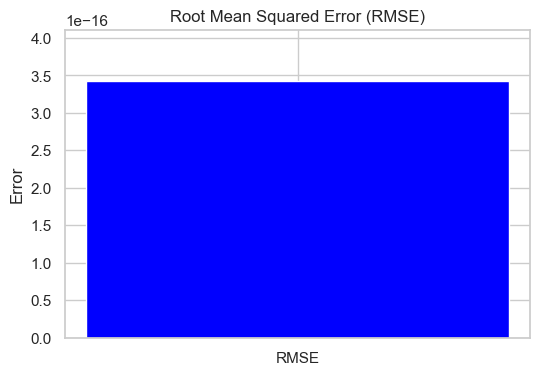

In [542]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Plot RMSE
plt.figure(figsize=(6, 4))
plt.bar(["RMSE"], [rmse], color='blue')
plt.ylabel("Error")
plt.title("Root Mean Squared Error (RMSE)")
plt.ylim(0, rmse * 1.2)  # Adding some padding for better visualization
plt.show()
